
### What data set am I using? ###
* StockX Data Contest 2019 from Kaggle
* Contains all purchases of Nike Off-White and Adidas Yeezy purchases
* Lists the retail prices, resale prices, purchase dates, release dates, buyer region

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import tree, metrics

df= pd.read_excel(r'C:\Users\15039\OneDrive\Documents\Data Science Project\StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [3]:
#dropping Yeezy brand
df.drop(df[df['Brand']!='Off-White'].index, inplace=True)

#organize column names 
df=df.reset_index(drop=True)
df


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600.0,160,2017-09-09,8.0,California
1,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090.0,160,2017-09-09,11.5,New York
2,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344.0,160,2017-09-09,10.0,New York
3,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325.0,160,2017-09-09,10.0,Massachusetts
4,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800.0,250,2017-09-09,12.0,Kentucky
...,...,...,...,...,...,...,...,...
27789,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.0,170,2018-11-28,11.0,New York
27790,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.0,170,2018-11-28,4.0,California
27791,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.0,170,2018-11-28,6.0,New York
27792,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.0,170,2018-11-28,10.0,Maryland


In [4]:
#Group shoes by size
#nikesize=df.groupby('Shoe Size')[['Shoe Size']].count()
#nikesize

#Find top sizes being purchase
#nikesize['Shoe Size'].nlargest(n=5)

#Group shoes by shoe model
#nikemodel=df.groupby('Sneaker Name')[['Sneaker Name']].count()
#nikemodel

#Find top models being purchase
#nikemodel['Sneaker Name'].nlargest(n=5)

In [5]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27794 entries, 0 to 27793
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    27794 non-null  datetime64[ns]
 1   Brand         27794 non-null  object        
 2   Sneaker Name  27794 non-null  object        
 3   Sale Price    27794 non-null  float64       
 4   Retail Price  27794 non-null  int64         
 5   Release Date  27794 non-null  datetime64[ns]
 6   Shoe Size     27794 non-null  float64       
 7   Buyer Region  27794 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 1.7+ MB


### About the Dataset
* 99,956 instances 
* Column Names: 'Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price', 'Release Date', 'Shoe Size', 'Buyer Region'
* Goal: Predict the sales price of these shoes based on the given attributes 

### Prepared the Dataset 

In [7]:
# Create new column = X that represents the age of the sneaker 
# Order Date - Release Date 

df['Shoe Age']= df['Order Date']-df['Release Date']
df['Shoe Age'] = df['Shoe Age'].dt.days
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Shoe Age
0,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600.0,160,2017-09-09,8.0,California,-2
1,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090.0,160,2017-09-09,11.5,New York,-2
2,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344.0,160,2017-09-09,10.0,New York,-2
3,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325.0,160,2017-09-09,10.0,Massachusetts,-2
4,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800.0,250,2017-09-09,12.0,Kentucky,-2
...,...,...,...,...,...,...,...,...,...
27789,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.0,170,2018-11-28,11.0,New York,77
27790,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.0,170,2018-11-28,4.0,California,77
27791,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.0,170,2018-11-28,6.0,New York,77
27792,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.0,170,2018-11-28,10.0,Maryland,77


In [8]:
#Dropped Order Date and Release Date columns
df.drop(['Order Date', 'Release Date','Brand','Buyer Region'],axis=1,inplace=True)

In [9]:
#Dropped '-' from Sneaker Name
df['Sneaker Name']=df['Sneaker Name'].str.replace('-',' ')
df

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Shoe Age
0,Nike Air Max 90 Off White,1600.0,160,8.0,-2
1,Nike Air Max 90 Off White,1090.0,160,11.5,-2
2,Nike Air Presto Off White,1344.0,160,10.0,-2
3,Nike Air Presto Off White,1325.0,160,10.0,-2
4,Nike Air VaporMax Off White,1800.0,250,12.0,-2
...,...,...,...,...,...
27789,Nike Zoom Fly Off White Pink,265.0,170,11.0,77
27790,Nike Zoom Fly Off White Pink,331.0,170,4.0,77
27791,Nike Zoom Fly Off White Pink,405.0,170,6.0,77
27792,Nike Zoom Fly Off White Pink,263.0,170,10.0,77


In [10]:
df['Sneaker Name'].unique()

array(['Nike Air Max 90 Off White', 'Nike Air Presto Off White',
       'Nike Air VaporMax Off White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Blazer Mid Off White', 'Nike Air Force 1 Low Off White',
       'Nike Air Max 97 Off White',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Zoom Fly Off White', 'Nike Air VaporMax Off White 2018',
       'Air Jordan 1 Retro High Off White White',
       'Nike Air VaporMax Off White Black',
       'Air Jordan 1 Retro High Off White University Blue',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Zoom Fly Mercurial Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper',
       'Nike Blazer Mid Off White Wolf Grey

In [12]:
#See correlation between the different attributes
df.corr().style.background_gradient('Oranges')

,Sale Price,Retail Price,Shoe Size,Shoe Age
Sale Price,1.000000,0.085411,0.045852,0.355227
Retail Price,0.085411,1.000000,0.003210,0.129342
Shoe Size,0.045852,0.003210,1.000000,0.049148
Shoe Age,0.355227,0.129342,0.049148,1.000000


In [13]:
#Create 2 new columns "Sneaker Model" and "Color" 
df[['Sneaker Model','Color']]=df['Sneaker Name'].str.split('Off White',expand=True)

In [14]:
df

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Shoe Age,Sneaker Model,Color
0,Nike Air Max 90 Off White,1600.0,160,8.0,-2,Nike Air Max 90,
1,Nike Air Max 90 Off White,1090.0,160,11.5,-2,Nike Air Max 90,
2,Nike Air Presto Off White,1344.0,160,10.0,-2,Nike Air Presto,
3,Nike Air Presto Off White,1325.0,160,10.0,-2,Nike Air Presto,
4,Nike Air VaporMax Off White,1800.0,250,12.0,-2,Nike Air VaporMax,
...,...,...,...,...,...,...,...
27789,Nike Zoom Fly Off White Pink,265.0,170,11.0,77,Nike Zoom Fly,Pink
27790,Nike Zoom Fly Off White Pink,331.0,170,4.0,77,Nike Zoom Fly,Pink
27791,Nike Zoom Fly Off White Pink,405.0,170,6.0,77,Nike Zoom Fly,Pink
27792,Nike Zoom Fly Off White Pink,263.0,170,10.0,77,Nike Zoom Fly,Pink


In [15]:
#Determining the unique shoe models
uniqueshoes=df['Sneaker Model'].unique()
uniqueshoes

array(['Nike Air Max 90 ', 'Nike Air Presto ', 'Nike Air VaporMax ',
       'Air Jordan 1 Retro High ', 'Nike Blazer Mid ',
       'Nike Air Force 1 Low ', 'Nike Air Max 97 ',
       'Nike Air Force 1 Low Virgil Abloh ',
       'Nike React Hyperdunk 2017 Flyknit ', 'Nike Zoom Fly ',
       'Nike Zoom Fly Mercurial '], dtype=object)

In [16]:
#Creating set of keywords of the unique shoe models
kw_array1=np.array_split(uniqueshoes,11)
kw_array1
keywordsmodel=set([])
for l in kw_array1:
    keywordsmodel.update(l)

#Created a loop to create columns that "tallies" the # of times it says that model
for model in keywordsmodel:
    df[model] = df['Sneaker Model'].apply(lambda x: 1 if x==model else 0)

df

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Shoe Age,Sneaker Model,Color,Nike Zoom Fly Mercurial,Air Jordan 1 Retro High,Nike Air VaporMax,Nike Blazer Mid,Nike Air Presto,Nike Zoom Fly,Nike Air Max 90,Nike React Hyperdunk 2017 Flyknit,Nike Air Max 97,Nike Air Force 1 Low Virgil Abloh,Nike Air Force 1 Low
0,Nike Air Max 90 Off White,1600.0,160,8.0,-2,Nike Air Max 90,,0,0,0,0,0,0,1,0,0,0,0
1,Nike Air Max 90 Off White,1090.0,160,11.5,-2,Nike Air Max 90,,0,0,0,0,0,0,1,0,0,0,0
2,Nike Air Presto Off White,1344.0,160,10.0,-2,Nike Air Presto,,0,0,0,0,1,0,0,0,0,0,0
3,Nike Air Presto Off White,1325.0,160,10.0,-2,Nike Air Presto,,0,0,0,0,1,0,0,0,0,0,0
4,Nike Air VaporMax Off White,1800.0,250,12.0,-2,Nike Air VaporMax,,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27789,Nike Zoom Fly Off White Pink,265.0,170,11.0,77,Nike Zoom Fly,Pink,0,0,0,0,0,1,0,0,0,0,0
27790,Nike Zoom Fly Off White Pink,331.0,170,4.0,77,Nike Zoom Fly,Pink,0,0,0,0,0,1,0,0,0,0,0
27791,Nike Zoom Fly Off White Pink,405.0,170,6.0,77,Nike Zoom Fly,Pink,0,0,0,0,0,1,0,0,0,0,0
27792,Nike Zoom Fly Off White Pink,263.0,170,10.0,77,Nike Zoom Fly,Pink,0,0,0,0,0,1,0,0,0,0,0


In [17]:
uniquecolors=df['Color'].unique()
uniquecolors

array(['', ' Chicago', ' AF100', ' 2018', ' White', ' Black',
       ' University Blue', ' Black 2018', ' White 2018', ' Total Orange',
       ' Elemental Rose Queen', ' All Hallows Eve', ' Grim Reaper',
       ' Wolf Grey', ' Menta', ' Black Silver', ' Pink', ' Volt',
       ' Black White', ' Desert Ore'], dtype=object)

In [18]:
#Creating set of keywords of the unique colors
kw_array2=np.array_split(uniquecolors,20)
kw_array2
keywordscolor=set([])
for l in kw_array2:
    keywordscolor.update(l)

#Created a loop to create columns that "tallies" the # of times it says that colorway
for color in keywordscolor:
    df[color] = df['Color'].apply(lambda x: 1 if x==color else 0)

df

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Shoe Age,Sneaker Model,Color,Nike Zoom Fly Mercurial,Air Jordan 1 Retro High,Nike Air VaporMax,...,Chicago,Black Silver,Volt,Desert Ore,AF100,Black White,All Hallows Eve,Black 2018,White 2018,Pink
0,Nike Air Max 90 Off White,1600.0,160,8.0,-2,Nike Air Max 90,,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nike Air Max 90 Off White,1090.0,160,11.5,-2,Nike Air Max 90,,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nike Air Presto Off White,1344.0,160,10.0,-2,Nike Air Presto,,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nike Air Presto Off White,1325.0,160,10.0,-2,Nike Air Presto,,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nike Air VaporMax Off White,1800.0,250,12.0,-2,Nike Air VaporMax,,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27789,Nike Zoom Fly Off White Pink,265.0,170,11.0,77,Nike Zoom Fly,Pink,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27790,Nike Zoom Fly Off White Pink,331.0,170,4.0,77,Nike Zoom Fly,Pink,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27791,Nike Zoom Fly Off White Pink,405.0,170,6.0,77,Nike Zoom Fly,Pink,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27792,Nike Zoom Fly Off White Pink,263.0,170,10.0,77,Nike Zoom Fly,Pink,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# Dropping Columns
df.drop(['Sneaker Name','Sneaker Model','Color','Retail Price'],axis=1,inplace=True)
df

,Sale Price,Shoe Size,Shoe Age,Nike Zoom Fly Mercurial,Air Jordan 1 Retro High,Nike Air VaporMax,Nike Blazer Mid,Nike Air Presto,Nike Zoom Fly,Nike Air Max 90,...,Chicago,Black Silver,Volt,Desert Ore,AF100,Black White,All Hallows Eve,Black 2018,White 2018,Pink
0,1600.0,8.0,-2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1090.0,11.5,-2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1344.0,10.0,-2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1325.0,10.0,-2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800.0,12.0,-2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27789,265.0,11.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
27790,331.0,4.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
27791,405.0,6.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
27792,263.0,10.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Decision Tree Regression

In [20]:
# Determining independent and dependent variables
X=df.drop(['Sale Price'],axis=1)
y=df['Sale Price']

In [21]:
# Split Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state=42)

In [22]:
# Modeling
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=8) 
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

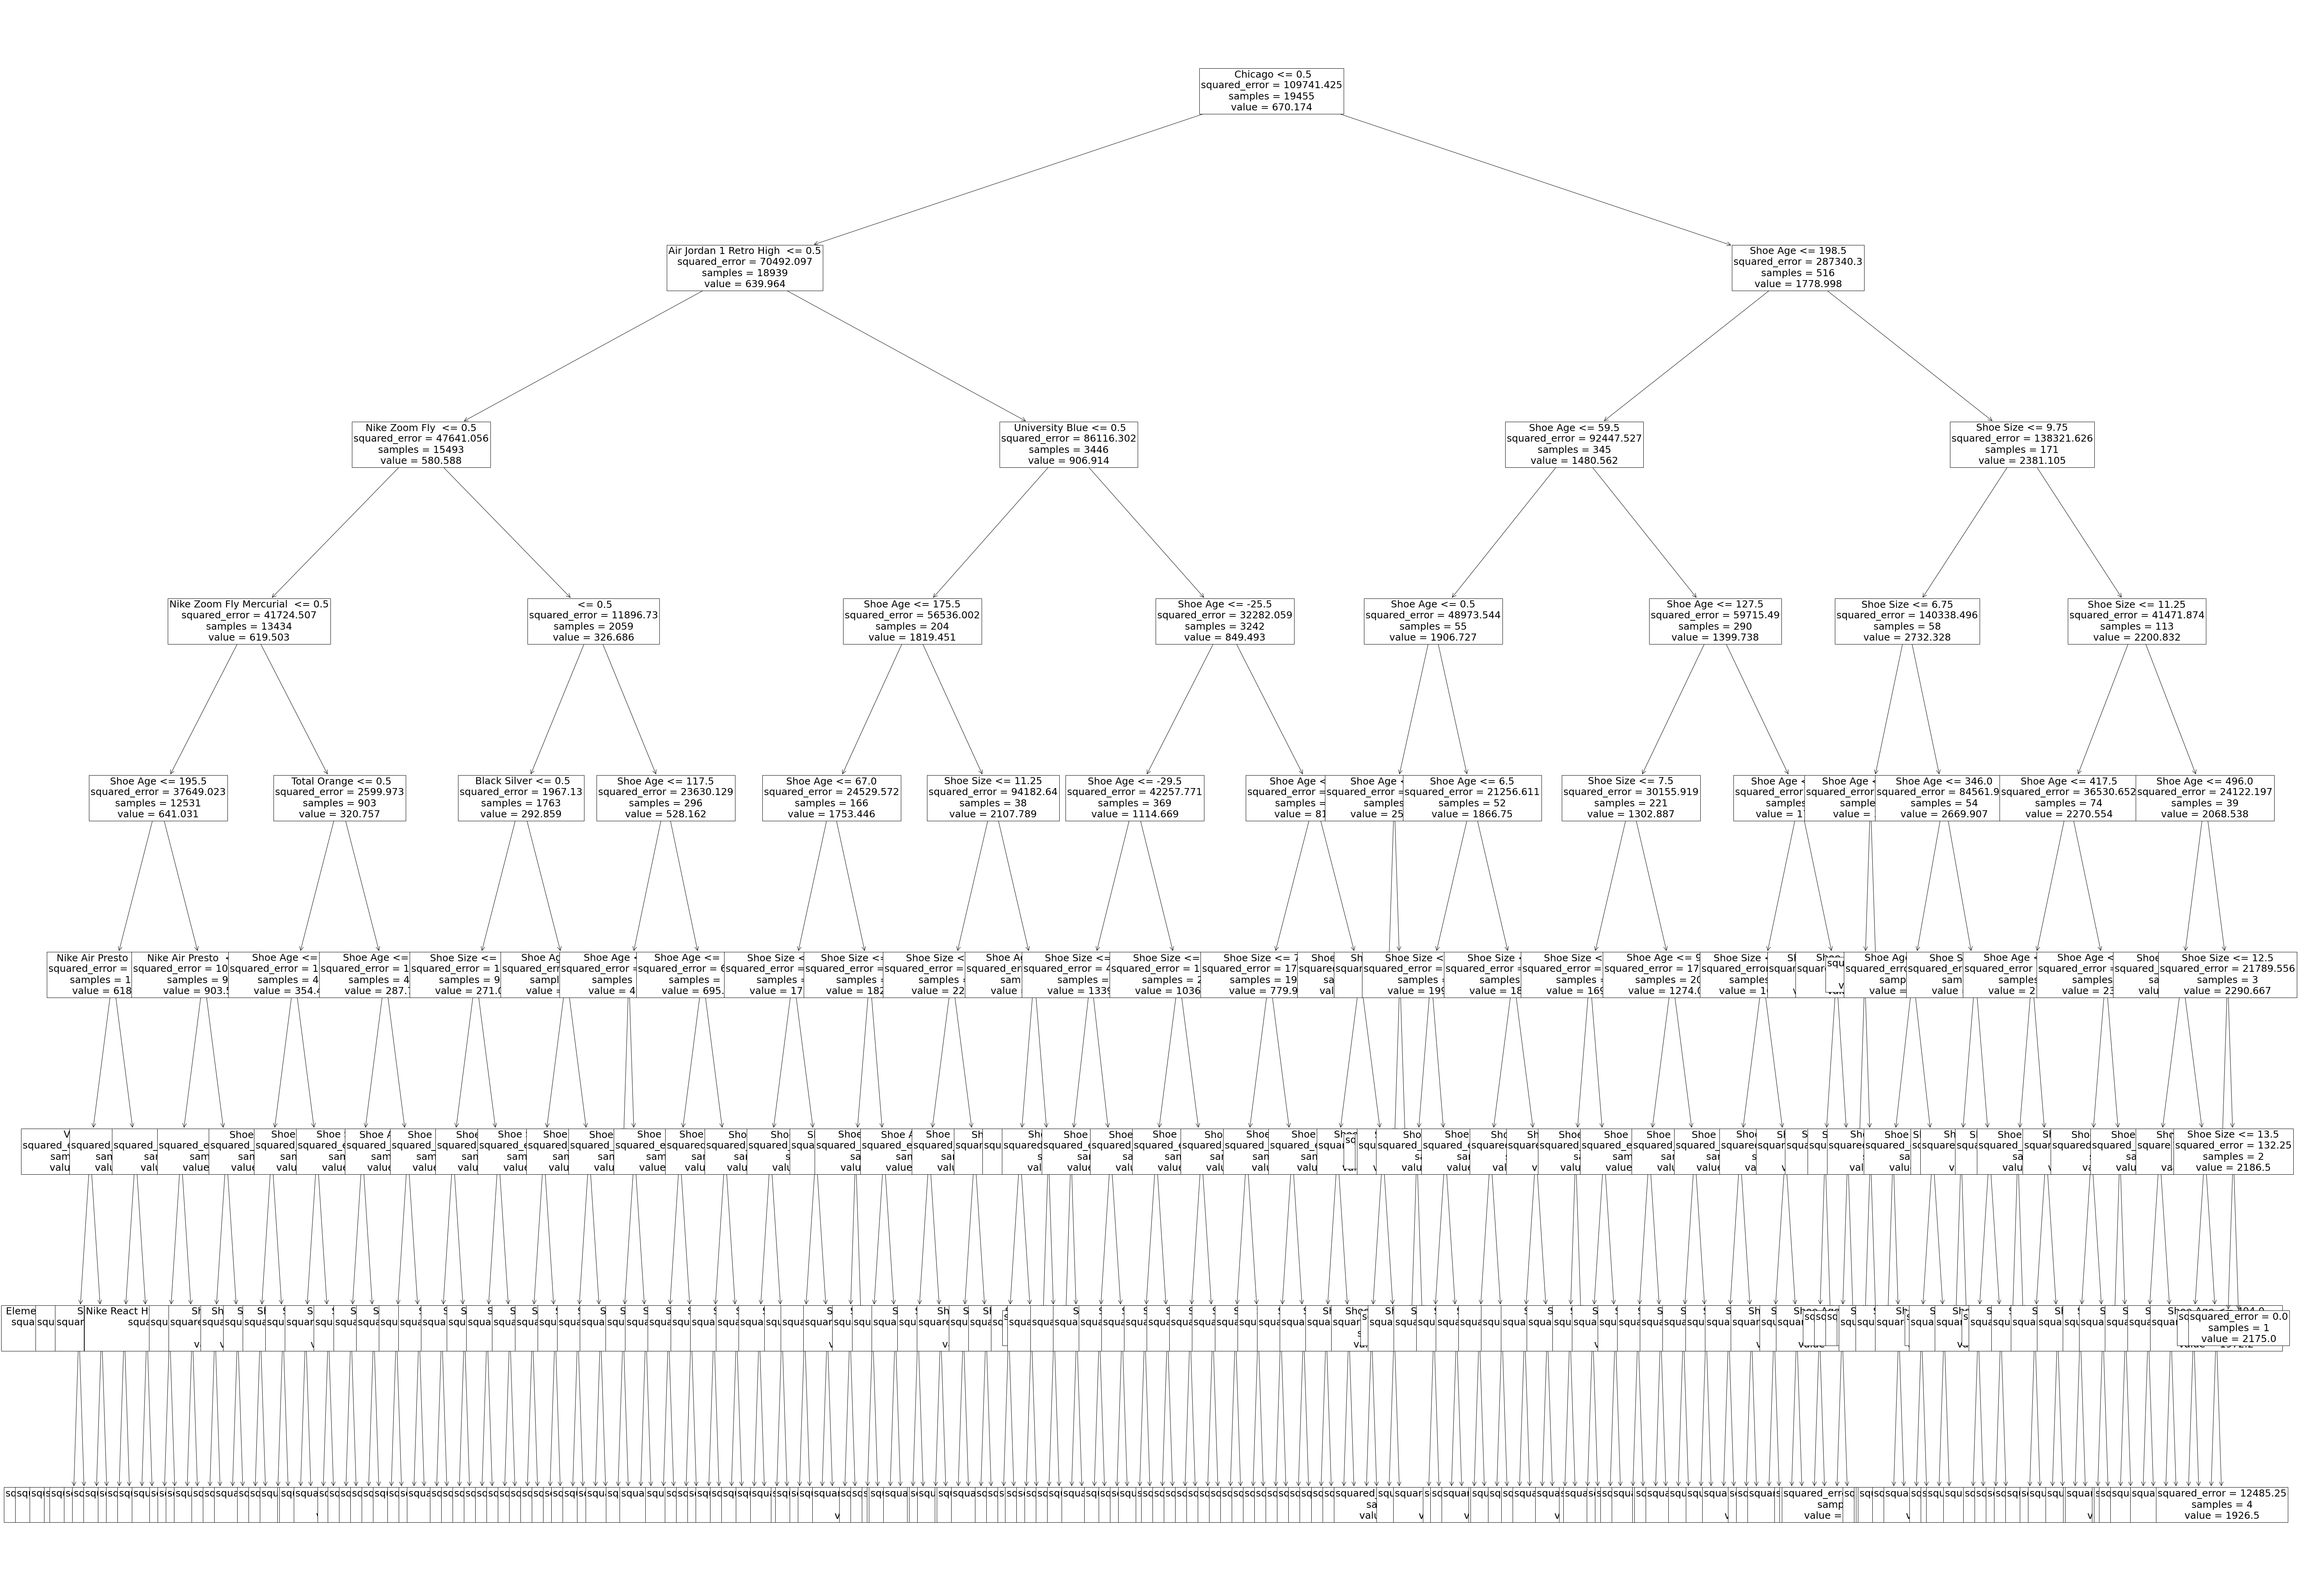

In [23]:
# Visualizing Decision Tree
from sklearn import tree
plt.figure(figsize = (100,75))

_= tree.plot_tree(dt_reg, 
                   feature_names=X.columns, 
                   class_names=y, 
                   filled=False, fontsize=25)
plt.show()

In [24]:
#Prediction 
y_pred=dt_reg.predict(X)
y_pred

#Column of Predictions 
df['Prediction']=y_pred
df

,Sale Price,Shoe Size,Shoe Age,Nike Zoom Fly Mercurial,Air Jordan 1 Retro High,Nike Air VaporMax,Nike Blazer Mid,Nike Air Presto,Nike Zoom Fly,Nike Air Max 90,...,Black Silver,Volt,Desert Ore,AF100,Black White,All Hallows Eve,Black 2018,White 2018,Pink,Prediction
0,1600.0,8.0,-2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,594.538324
1,1090.0,11.5,-2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,594.538324
2,1344.0,10.0,-2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1023.794393
3,1325.0,10.0,-2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1023.794393
4,1800.0,12.0,-2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,594.538324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27789,265.0,11.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,248.101064
27790,331.0,4.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,325.200000
27791,405.0,6.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,398.000000
27792,263.0,10.0,77,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,248.101064


In [25]:
#Model Peformance 
mse=mean_squared_error(y_pred,y)
r2=r2_score(y_pred,y)
print("MSE:",mse)
print("Coefficient of Determination:",r2)

MSE: 10152.584355205378
Coefficient of Determination: 0.9001700315436845
